<a href="https://colab.research.google.com/github/jmins33/Seaborn/blob/master/seaborn_tutorial/seaborn_tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing linear relationships


In [97]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
sns.set(color_codes=True)

In [99]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/weather'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

In [101]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive/Colab Notebooks/weather
weather2.csv  weather.csv


In [102]:
weather = pd.read_csv("weather2.csv")
weather.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent_Temperature,Humidity,Wind_Speed,Wind_Bearing,Visibility,Loud Cover,Pressure,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


# Functions to draw linear regression models
- Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality.
- It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

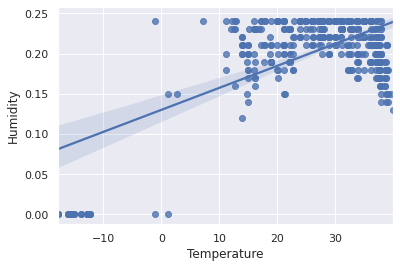

In [103]:
sns.regplot(x='Temperature', y='Humidity', data=weather.query('Humidity< 0.25'))

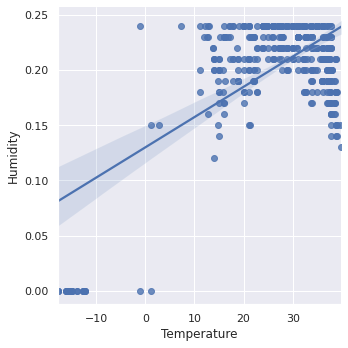

In [104]:
sns.lmplot(x='Temperature', y='Humidity', data=weather.query('Humidity< 0.25'))

-  the resulting plots are identical, except that the figure shapes are different.
- regplot()이 단순한 numpy 배열, 팬더 시리즈 객체 또는 데이터에 전달된 팬더 DataFrame 객체의 변수에 대한 참조로서 x와 y 변수를 다양한 형식으로 수용한다.
- lmplot()은 데이터를 필수 매개변수로 가지고 있으며 x와 y 변수는 문자열로 지정해야 한다.


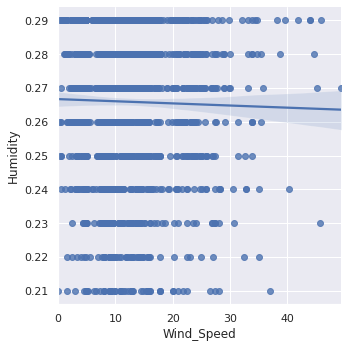

In [106]:
sns.lmplot(x='Wind_Speed', y='Humidity', data=weather.query('0.2< Humidity< 0.30'))

- 한 가지 옵션은 이산형 값에 일부 무작위 노이즈("jitter")를 추가하여 해당 값의 분포를 보다 명확하게 하는 것이다. jitter는 산점도 데이터에만 적용되며 회귀선 적합 자체에는 영향을 미치지 않는다는 점에 유의할 것.

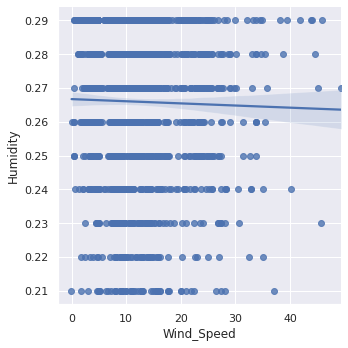

In [107]:
sns.lmplot(x='Wind_Speed', y='Humidity', data=weather.query('0.2< Humidity< 0.30'), x_jitter=.05 )

- A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval.

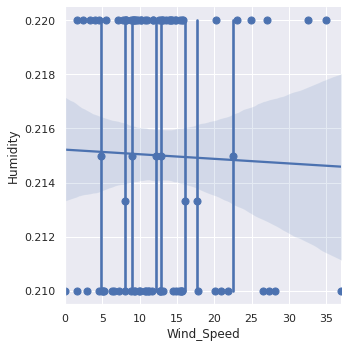

In [108]:
sns.lmplot(x='Wind_Speed', y='Humidity', data=weather.query('0.2< Humidity< 0.23'), x_estimator=np.mean )

# Fitting different kinds of models
- The simple linear regression model used above is very simple to fit, however, it is not appropriate for some kinds of datasets. 
- The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 

In [109]:
anscombe = sns.load_dataset("anscombe")

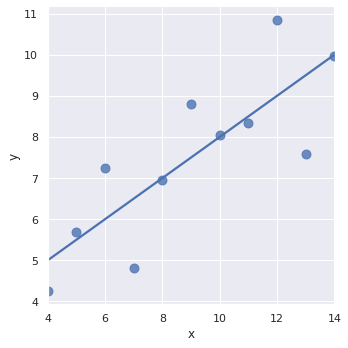

In [110]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80})

- **위의 그래프는 good model**
- The linear relationship in the second dataset is the same, but the plot clearly shows that **this is not a good model**

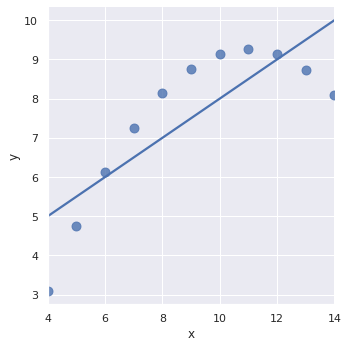

In [111]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

-  lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset.

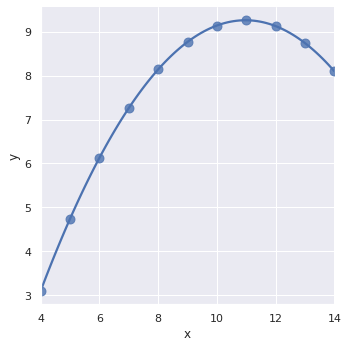

In [112]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=5, ci=None, scatter_kws={"s": 80})

- order : int, optional
 + If order is greater than 1, use numpy.polyfit to estimate a polynomial regression.

- A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study.

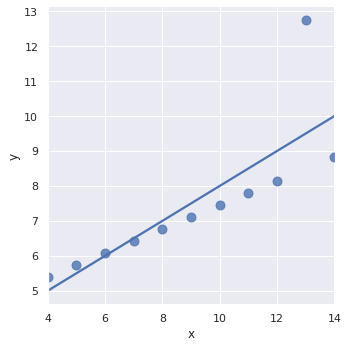

In [113]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

- In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals.

- robust : bool, optional
 + If True, use statsmodels to estimate a robust regression. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so you may wish to decrease the number of bootstrap resamples (n_boot) or set ci to None.

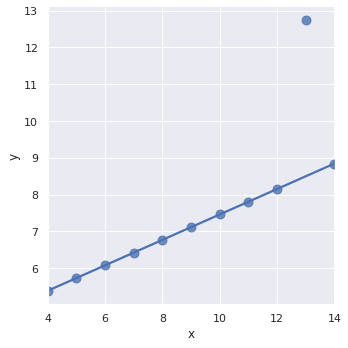

In [114]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80})

- When the y variable is binary, simple linear regression also “works” but provides implausible predictions.

In [126]:
weather['ww'] = (weather.Humidity / weather.Temperature) > .15
tips = sns.load_dataset("tips")

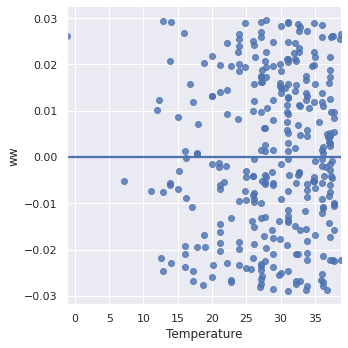

In [124]:
sns.lmplot(x="Temperature", y="ww", data=weather.query('0.2< Humidity< 0.25'),
           y_jitter=.03)

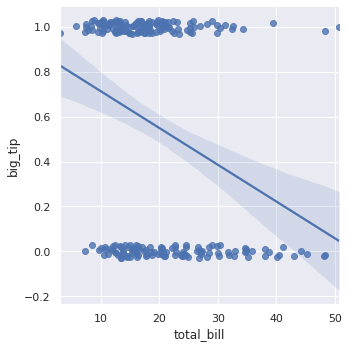

In [127]:
# 가져온 데이터 모양이 튜토리얼과 안 맞아, tip 데이터도 같이 함.

tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

- The solution in this case is to fit a logistic regression, such that the regression line shows the estimated probability of y = 1 for a given value of x.

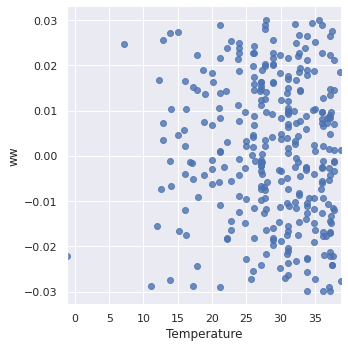

In [125]:
sns.lmplot(x="Temperature", y="ww", data=weather.query('0.2< Humidity< 0.25'),
           logistic=True, y_jitter=.03)

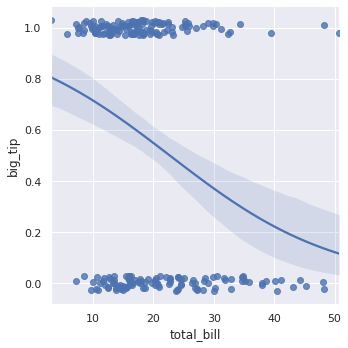

In [128]:
# 가져온 데이터 모양이 튜토리얼과 안 맞아, tip 데이터도 같이 함.
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03)

- the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

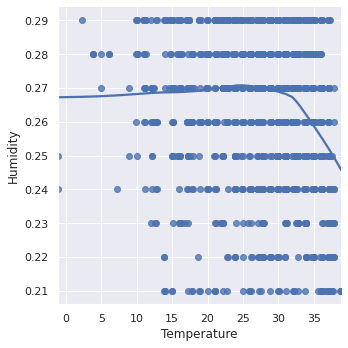

In [131]:
sns.lmplot(x="Temperature", y="Humidity", data=weather.query('0.2< Humidity< 0.30'), lowess=True)

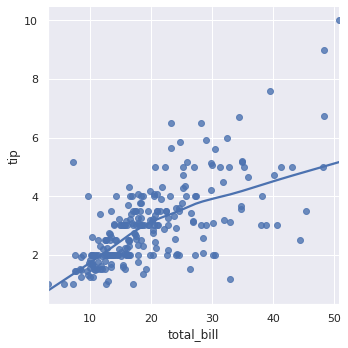

In [129]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

- 단순 회귀 모형이 데이터 집합에 적합한지 여부를 확인하는 데 유용한 도구가 될 수 있다.
- 이상적으로 이러한 값은 y = 0 주위에 랜덤하게 흩어져야 한다.
- {scatter,line}_kws : dictionaries
 + Additional keyword arguments to pass to plt.scatter and plt.plot.

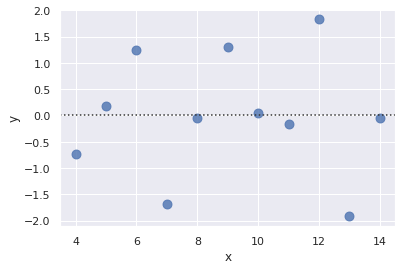

In [132]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80})

- If there is structure in the residuals, it suggests that simple linear regression is not appropriate.

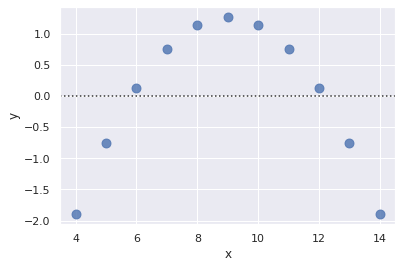

In [133]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80})

# Conditioning on other variables
- The plots above show many ways to explore the relationship between a pair of variables. 
- Often, however, a more interesting question is “how does the relationship between these two variables change as a function of a third variable?”
- This is where the difference between regplot() and lmplot() appears. While regplot() always shows a single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

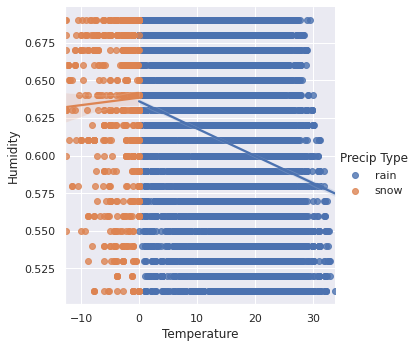

In [141]:
sns.lmplot(x='Temperature', y='Humidity', hue='Precip Type', data=weather.query('0.5< Humidity< 0.7'))

- In addition to color, it’s possible to use **different scatterplot markers** to make plots the reproduce to black and white better. 

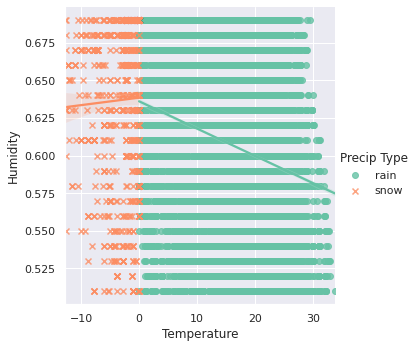

In [143]:
sns.lmplot(x='Temperature', y='Humidity', hue='Precip Type', data=weather.query('0.5< Humidity< 0.7'), markers=["o", "x"], palette="Set2")

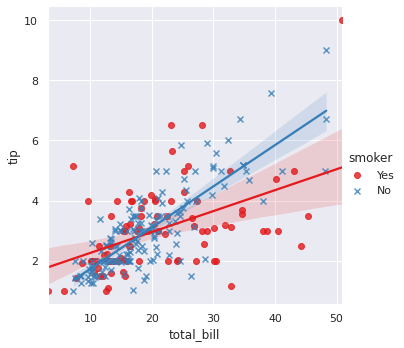

In [148]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

- To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid.

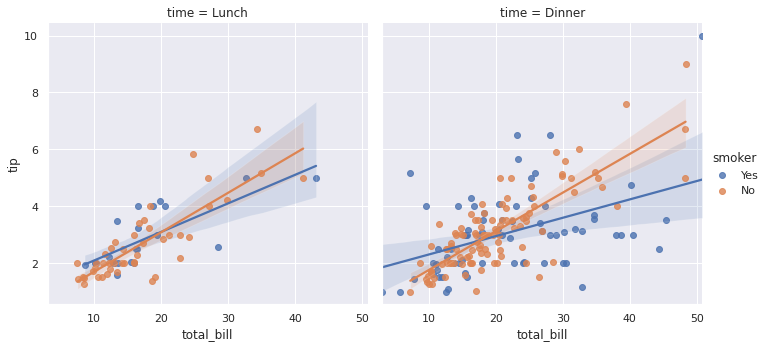

In [146]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)

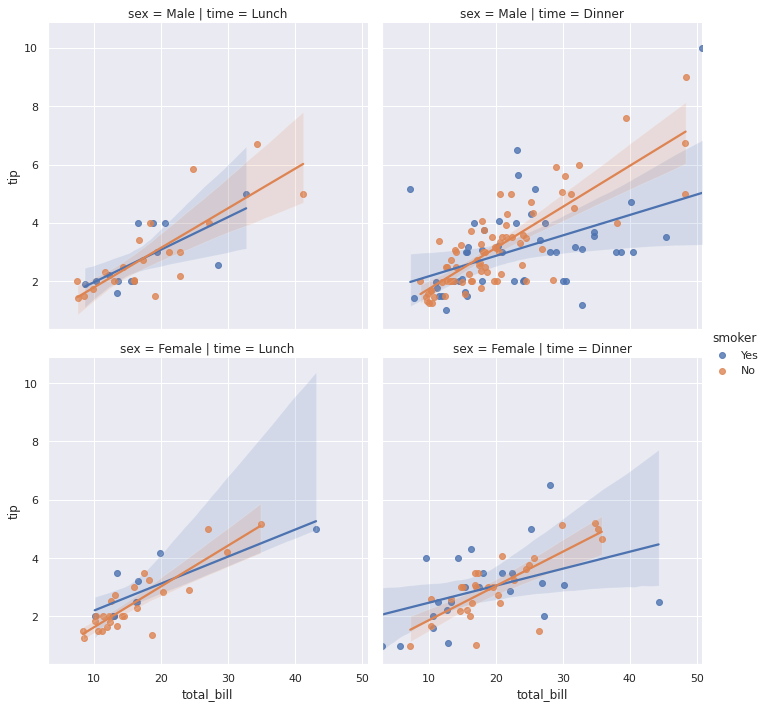

In [147]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

# Controlling the size and shape of the plot
- Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because regplot() is an “axes-level” function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. 

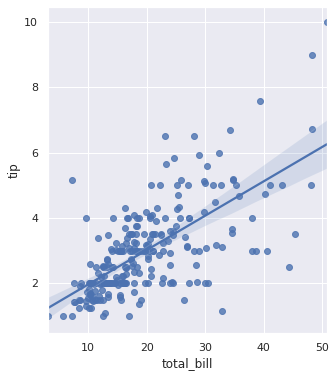

In [150]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax)

- 대조적으로, lmplot() 그림의 크기와 모양은 전체 그림 자체가 아니라 그림의 각 면에 적용되는 높이와 측면 파라미터를 사용하여 (FacetGrid 인터페이스를 통해)제어된다.

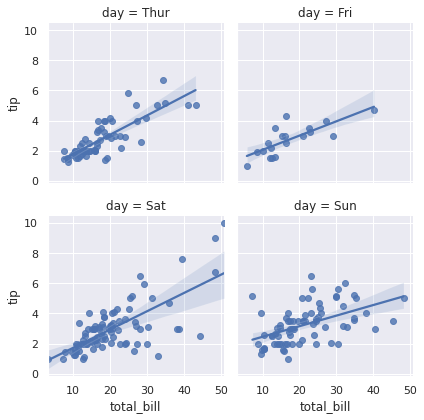

In [153]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3)

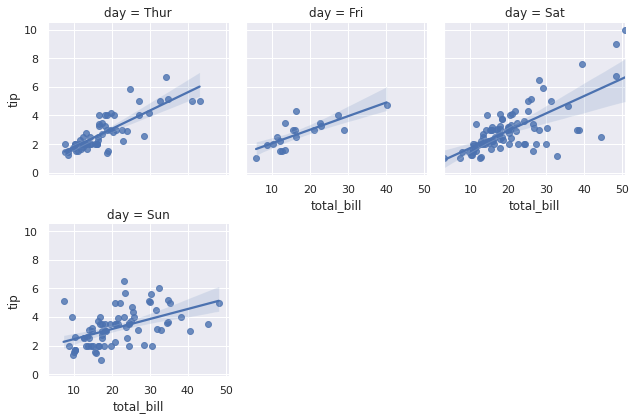

In [160]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=3, height=3)
# col_wrap 열의 개수

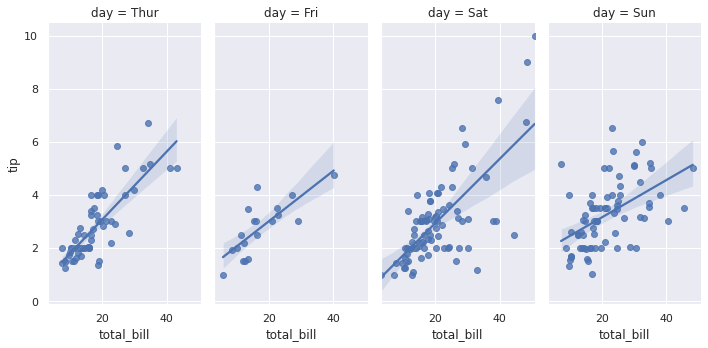

In [156]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.5)

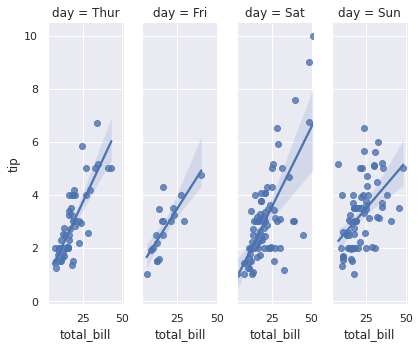

In [159]:
# aspect 작을수록 좁아진다.
sns.lmplot(x="total_bill", y="tip", col="day", data=tips, aspect=.3)

# Plotting a regression in other contexts
- A few other seaborn functions use regplot() in the context of a larger, more complex plot. The first is the jointplot() function that we introduced in the distributions tutorial.

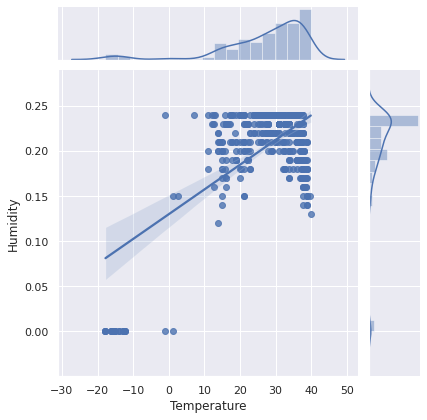

In [162]:
sns.jointplot(x='Temperature', y='Humidity', data=weather.query('Humidity< 0.25'), kind="reg")

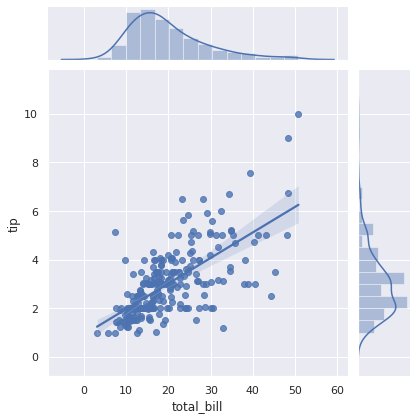

In [161]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

- the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset.

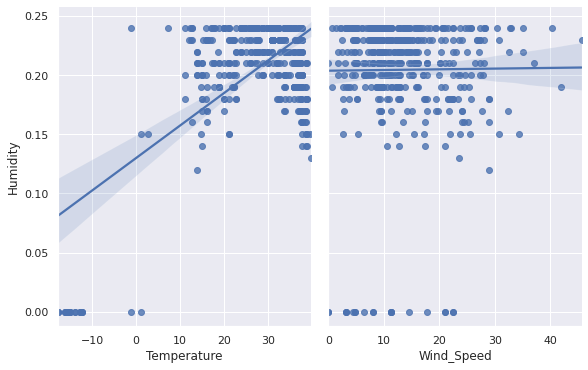

In [163]:
sns.pairplot(weather.query('Humidity< 0.25'), x_vars=['Temperature','Wind_Speed'],
             y_vars=['Humidity'], height=5, aspect=.8, kind="reg")

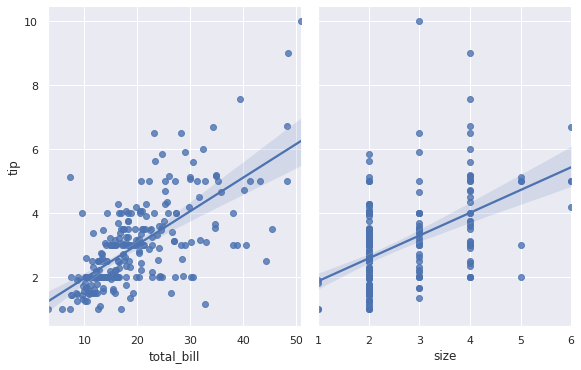

In [164]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg")

- Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter.

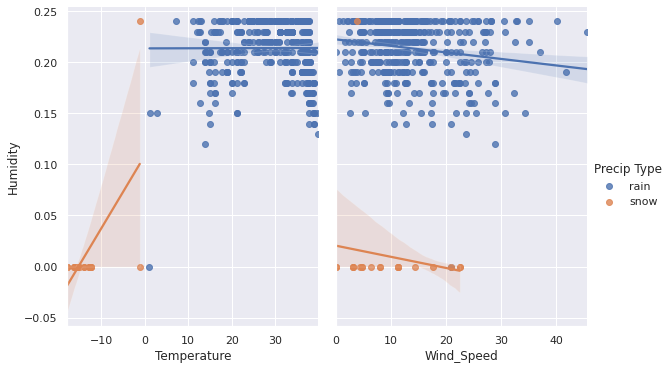

In [165]:
sns.pairplot(weather.query('Humidity< 0.25'), x_vars=['Temperature','Wind_Speed'],
             y_vars=['Humidity'], hue='Precip Type', height=5, aspect=.8, kind="reg")

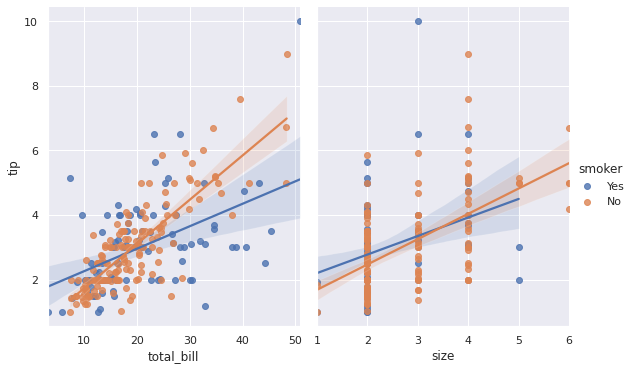

In [166]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg")